## week4 住宅価格予想

## 必要なモジュールのインポート

In [1]:
import numpy as np # 線形代数ライブラリー
import matplotlib.pyplot as plt # 描画ライブラリー
import seaborn as sns # 描画ライブラリー
from sklearn.datasets import load_boston # ボストン住宅価格データ
from scipy.stats import zscore # zスコアライブラリー
import pandas as pd # データ操作ライブラリー
from sklearn.linear_model import LinearRegression # 線形回帰モデル
from sklearn.preprocessing import PolynomialFeatures # 多項式モデル
from sklearn.model_selection import train_test_split # テストデータの分割
from sklearn.metrics import mean_squared_error # 平均二乗誤差回帰損失
from scipy import stats
from scipy.stats import norm
#from custom_encode import custom_encode# 独自モジュール

color = sns.color_palette() # カラーパレット

## 必要なファイルを読込み
概要を確認する

In [2]:
# 各csvファイルの読み込み
sample_submission_pd = pd.read_csv("./input/sample_submission.csv")
test_df = pd.read_csv("./input/test.csv")
train_df = pd.read_csv("./input/train.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df["OverallQual"]

0        7
1        6
2        7
3        7
4        8
5        5
6        8
7        7
8        7
9        5
10       5
11       9
12       5
13       7
14       6
15       7
16       6
17       4
18       5
19       5
20       8
21       7
22       8
23       5
24       5
25       8
26       5
27       8
28       5
29       4
        ..
1430     5
1431     6
1432     4
1433     6
1434     5
1435     6
1436     4
1437     8
1438     6
1439     7
1440     6
1441     6
1442    10
1443     6
1444     7
1445     6
1446     5
1447     8
1448     4
1449     5
1450     5
1451     8
1452     5
1453     5
1454     7
1455     6
1456     6
1457     7
1458     5
1459     5
Name: OverallQual, Length: 1460, dtype: int64

In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 欠損値処理

In [30]:
# データセットの型を調べる
train_df.dtypes.value_counts()

int64      78
float64     3
dtype: int64

In [9]:
# 各カラムの欠損値確認
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [10]:
# 欠損値処理
# [処理条件を入れる]
train_null_index = train_df.isnull().sum()[train_df.isnull().sum() > 0].index
test_null_index = test_df.isnull().sum()[test_df.isnull().sum() > 0].index

In [11]:
# 欠損値にあるカラムのみ表示
# 学習データの欠損値
train_df[train_null_index].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [12]:
# 欠損値にあるカラムのみ表示
# テストデータの欠損値
test_df[test_null_index].head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,80.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD
1,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,...,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD
2,RL,74.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,Gd,TA,...,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD
3,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,...,1998.0,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD
4,RL,43.0,NaN,AllPub,HdBoard,HdBoard,None,0.0,Gd,TA,...,1992.0,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD


In [13]:
# 文字オブジェクト抽出
object_columns = test_df.select_dtypes(include=object).columns
for i in object_columns:
    print("*************")
    print(test_df[i].value_counts())
    print("*************")

*************
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
*************
*************
Pave    1453
Grvl       6
Name: Street, dtype: int64
*************
*************
Grvl    70
Pave    37
Name: Alley, dtype: int64
*************
*************
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64
*************
*************
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64
*************
*************
AllPub    1457
Name: Utilities, dtype: int64
*************
*************
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
*************
*************
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
*************
*************
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      5

In [14]:
# 文字列型のカラムを変換
for column in object_columns:
    labels, uniques = pd.factorize(train_df[column])
    train_df[column] = labels
    
    # train_df のカラムを抽出
    labels_test = uniques.get_indexer(test_df[column])
    test_df[column] = labels_test
    
print(train_df.head())
print(test_df.head())

   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         0         65.0     8450       0     -1         0   
1   2          20         0         80.0     9600       0     -1         0   
2   3          60         0         68.0    11250       0     -1         1   
3   4          70         0         60.0     9550       0     -1         1   
4   5          60         0         84.0    14260       0     -1         1   

   LandContour  Utilities    ...      PoolArea  PoolQC  Fence  MiscFeature  \
0            0          0    ...             0      -1     -1           -1   
1            0          0    ...             0      -1     -1           -1   
2            0          0    ...             0      -1     -1           -1   
3            0          0    ...             0      -1     -1           -1   
4            0          0    ...             0      -1     -1           -1   

   MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice

In [47]:
# 欠損値0埋め
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

In [48]:
# 整数型のカラムのみ抽出
#test_df.select_dtypes(include=int).columns

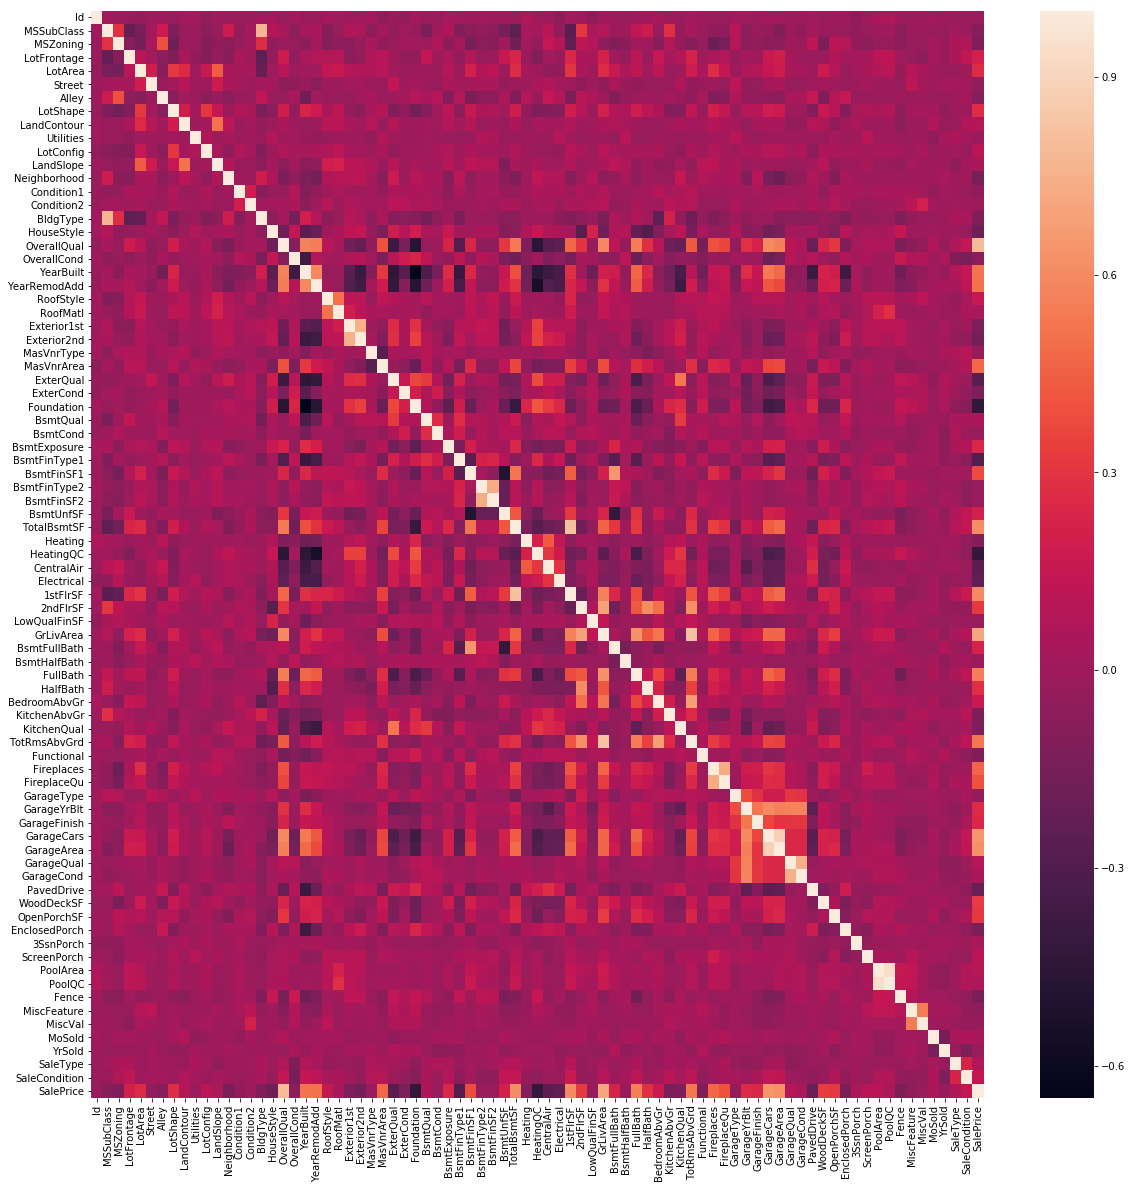

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr())

In [18]:
train_df.corr()["SalePrice"].abs().sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Foundation      0.429678
HeatingQC       0.427649
FireplaceQu     0.402854
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
BsmtFinType1    0.299343
HalfBath        0.284108
LotShape        0.267759
ExterQual       0.265015
LotArea         0.263843
CentralAir      0.251328
GarageFinish    0.247470
BsmtExposure    0.244946
                  ...   
Heating         0.106673
Alley           0.092607
PoolArea        0.092404
LandContour     0.092009
MSSubClass      0.084284
GarageQual      0.083479
OverallCond     0.077856
SaleType        0.072896
MiscFeature     0.061128


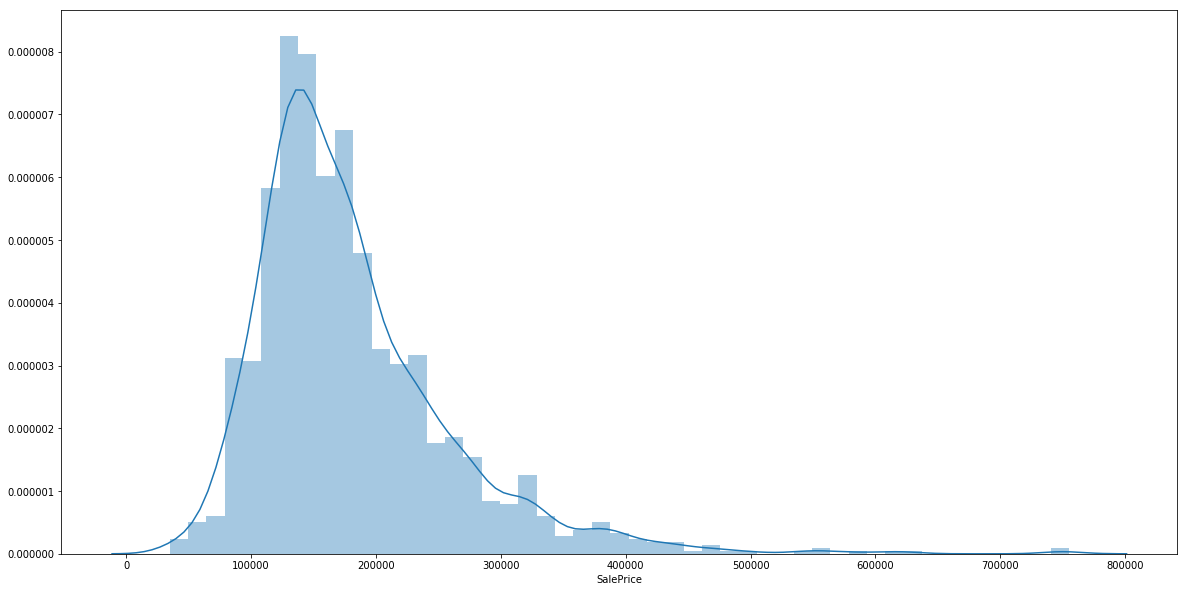

In [27]:
# 分布確認
plt.figure(figsize=(20,10))
sns.distplot(train_df["SalePrice"])

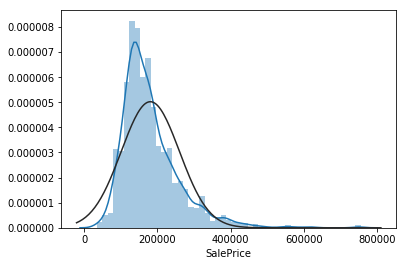

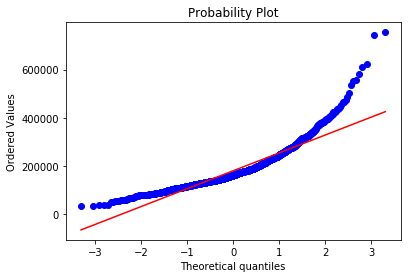

In [20]:
sns.distplot(train_df['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

In [50]:
# 目的変数を対数で正規化する
y_train = np.log(train_df["SalePrice"])

## 線形回帰モデル

In [51]:
# 線形回帰モデル
lin_1d = LinearRegression() # 線形モデルインスタンスの生成
x = train_df.OverallQual
# 線形回帰によるモデル生成
lin_1d.fit(x[:,None], y_train) # DataLstat_trainをベクトルから行列に変換

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
# 線形モデル決定係数
score_1d = lin_1d.score(x[:,None], y_train)
print("一次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_1d))

一次式における'LSTAT'の住宅価格への決定係数は0.67


In [53]:
from sklearn.ensemble import RandomForestRegressor # ランダムフォレスト回帰用
# ランダムフォレストの作成
rfr = RandomForestRegressor(100)
rfr.fit(x[:, None], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [99]:
# テストから説明変数を抽出
x = test_df.OverallQual

# 学習
result = rfr.predict(x[:,None])

# dataframe に変換
Result = pd.DataFrame(np.exp(result))

# idカラムを取得
Id = pd.DataFrame(test_df.Id)
Id.rename(columns={0:"Id"})

# 結合してリネネイム
Result = pd.concat([Id, Result], axis=1)
Result.rename(columns={0:"SalePrice"})
# csv出力
Result.to_csv("Result.csv", index=False)

        Id              0
0     1461  130602.179016
1     1462  157638.188700
2     1463  130602.179016
3     1464  157638.188700
4     1465  266805.597931
5     1466  157638.188700
6     1467  157638.188700
7     1468  157638.188700
8     1469  202757.901184
9     1470  104216.378647
10    1471  202757.901184
11    1472  157638.188700
12    1473  130602.179016
13    1474  157638.188700
14    1475  202757.901184
15    1476  356973.422527
16    1477  266805.597931
17    1478  356973.422527
18    1479  266805.597931
19    1480  356973.422527
20    1481  266805.597931
21    1482  266805.597931
22    1483  157638.188700
23    1484  202757.901184
24    1485  202757.901184
25    1486  202757.901184
26    1487  266805.597931
27    1488  266805.597931
28    1489  202757.901184
29    1490  157638.188700
...    ...            ...
1429  2890  104216.378647
1430  2891  157638.188700
1431  2892   83690.687446
1432  2893  130602.179016
1433  2894   83690.687446
1434  2895  266805.597931
1435  2896  

In [36]:
x_test = 
rfr.predict()
#rfr.score(x[:, None], y_train)

0.6733550173225105

In [43]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

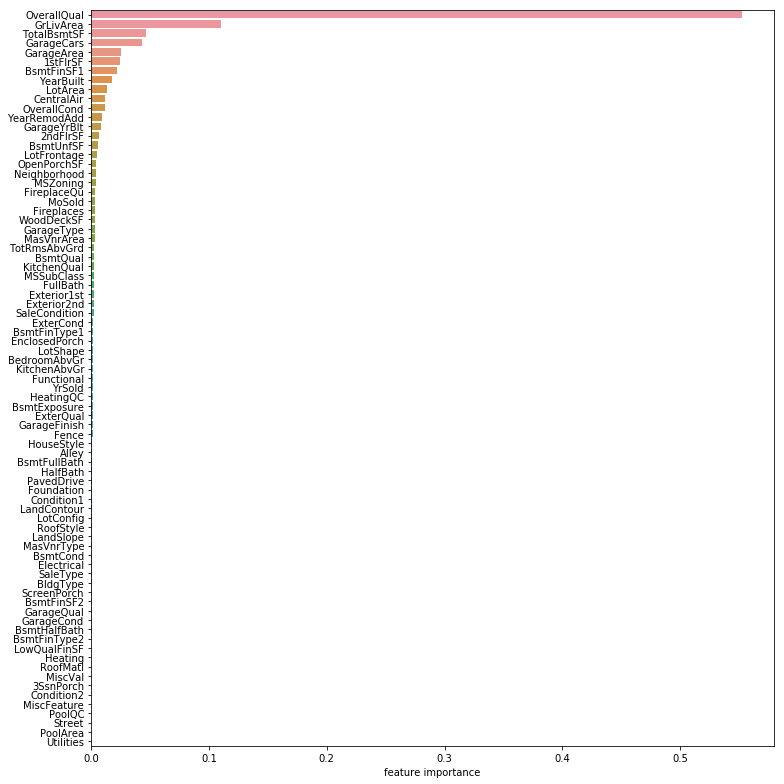

In [73]:
from sklearn.ensemble import RandomForestRegressor

# 特徴変数カラム名抽出
train_features = [f for f in train_df if f not in ["Id", "SalePrice"]]

# カラム名取得
feat_labels = train_df.columns

# ランダムフォレストのインスタンス生成
forest = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)

# 学習
forest.fit(train_df[train_features], y_train)

# 重要変数の抽出
importances = forest.feature_importances_

# 並び変えたインスタンスを取得
indices = np.argsort(importances)

# for f in range(train_df[train_features].shape[1]):
#    print("%2d) %-*s %f" %
#          (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

############################## RandomForest_feature_importanceプロット

ranking = np.argsort(-forest.feature_importances_)# np.argsort()の引数の頭に“-”をつけると降順にソートされる。

f, ax = plt.subplots(figsize=(11, 11))

sns.barplot(x=forest.feature_importances_[ranking], y=train_df[train_features].columns.values[ranking], orient="h")

ax.set_xlabel("feature importance")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
